In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [1]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:.10f}'.format

NameError: name 'pd' is not defined

In [2]:
df = pd.read_csv('../datasets/pepeusdt_5m.csv')
df.head()

NameError: name 'pd' is not defined

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85512 entries, 0 to 85511
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   event_type                    85512 non-null  object 
 1   event_time                    85512 non-null  int64  
 2   symbol                        85512 non-null  object 
 3   kline_start_time              85512 non-null  int64  
 4   kline_close_time              85512 non-null  int64  
 5   interval                      85512 non-null  object 
 6   first_trade_id                85512 non-null  int64  
 7   last_trade_id                 85512 non-null  int64  
 8   open_price                    85512 non-null  float64
 9   close_price                   85512 non-null  float64
 10  high_price                    85512 non-null  float64
 11  low_price                     85512 non-null  float64
 12  volume                        85512 non-null  float64
 13  n

In [19]:
df['kline_close_time'] = pd.to_datetime(df['kline_close_time'], unit='ms')
df['kline_start_time'] = pd.to_datetime(df['kline_start_time'], unit='ms')
df['event_time'] = pd.to_datetime(df['event_time'], unit='ms')

In [20]:
df.head()

,event_type,event_time,symbol,kline_start_time,kline_close_time,interval,first_trade_id,last_trade_id,open_price,close_price,high_price,low_price,volume,number_of_trades,is_kline_closed,quote_assest_volume,take_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,kline,2024-06-28 20:23:02.967,PEPEUSDT,2024-06-28 20:20:00,2024-06-28 20:24:59.999,5m,131572709,131573022,0.0000117700,0.0000117700,0.0000117700,0.0000117400,21865791172.0000000000,314,False,257149.5515482300,12380287280.0000000000,145601.3104659100,0
1,kline,2024-06-28 20:23:05.966,PEPEUSDT,2024-06-28 20:20:00,2024-06-28 20:24:59.999,5m,131572709,131573024,0.0000117700,0.0000117700,0.0000117700,0.0000117400,21974175367.0000000000,316,False,258425.2335233800,12488671475.0000000000,146876.9924410600,0
2,kline,2024-06-28 20:23:08.444,PEPEUSDT,2024-06-28 20:20:00,2024-06-28 20:24:59.999,5m,131572709,131573025,0.0000117700,0.0000117700,0.0000117700,0.0000117400,21984298991.0000000000,317,False,258544.3885778600,12498795099.0000000000,146996.1474955400,0
3,kline,2024-06-28 20:23:10.966,PEPEUSDT,2024-06-28 20:20:00,2024-06-28 20:24:59.999,5m,131572709,131573026,0.0000117700,0.0000117700,0.0000117700,0.0000117400,22480616291.0000000000,318,False,264386.0431988600,12995112399.0000000000,152837.8021165400,0
4,kline,2024-06-28 20:23:13.719,PEPEUSDT,2024-06-28 20:20:00,2024-06-28 20:24:59.999,5m,131572709,131573028,0.0000117700,0.0000117600,0.0000117700,0.0000117400,22489454157.0000000000,320,False,264490.0614647800,13003608575.0000000000,152937.8021080600,0


In [21]:
df = df.sort_values(by='event_time')

In [22]:
df[df['event_time'].duplicated(keep=False)]

,event_type,event_time,symbol,kline_start_time,kline_close_time,interval,first_trade_id,last_trade_id,open_price,close_price,high_price,low_price,volume,number_of_trades,is_kline_closed,quote_assest_volume,take_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore


In [9]:
df['time_diff_event_time'] = df['event_time'].diff()
df['event_time_seconds'] = df['time_diff_event_time'].dt.total_seconds()
df['event_time_seconds'] = df['event_time_seconds'].round().astype('Int64')

In [10]:
mean = df['event_time_seconds'].mean()
std = df['event_time_seconds'].std()


df['z_score'] = (df['event_time_seconds'] - mean) / std
anomalies = df[df['z_score'].abs() > 3]
anomalies[['event_time_seconds', 'z_score']].sort_values(ascending=False, by='event_time_seconds')

,event_time_seconds,z_score
52044,1616,280.4465773424
26498,28,4.3132078473
24154,28,4.3132078473
24917,28,4.3132078473
19692,26,3.9654328227
9528,26,3.9654328227
81458,25,3.7915453104
81628,25,3.7915453104
3788,25,3.7915453104
20712,24,3.6176577982


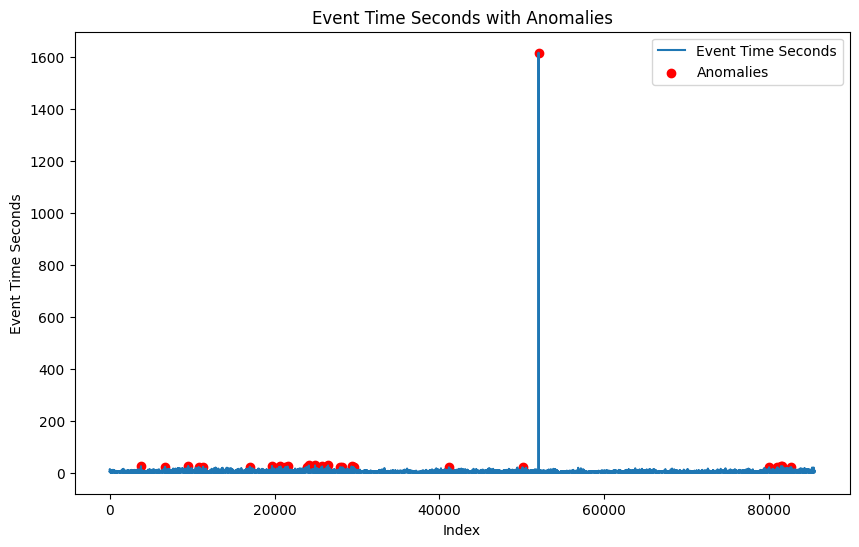

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(df['event_time_seconds'], label='Event Time Seconds')
plt.scatter(anomalies.index, anomalies['event_time_seconds'], color='red', label='Anomalies')
plt.xlabel('Index')
plt.ylabel('Event Time Seconds')
plt.title('Event Time Seconds with Anomalies')
plt.legend()
plt.show()

In [12]:
df.loc[52043:52045]

,event_type,event_time,symbol,kline_start_time,kline_close_time,interval,first_trade_id,last_trade_id,open_price,close_price,high_price,low_price,volume,number_of_trades,is_kline_closed,quote_assest_volume,take_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,time_diff_event_time,event_time_seconds,z_score
52043,kline,2024-06-30 19:57:44.742,PEPEUSDT,2024-06-30 19:55:00,2024-06-30 19:59:59.999,5m,132182675,132184161,0.0000116200,0.0000116200,0.0000116600,0.0000116100,39889932295.0000000000,1487,False,464430.9510943700,27919444115.0000000000,325118.8156118300,0,0 days 00:00:03.962000,4,0.1399075526
52044,kline,2024-06-30 20:24:40.428,PEPEUSDT,2024-06-30 20:20:00,2024-06-30 20:24:59.999,5m,132187753,132189400,0.0000116300,0.0000116600,0.0000116800,0.0000116200,104902338546.0000000000,1648,False,1223440.6650151201,76356806692.0000000000,890723.8545267900,0,0 days 00:26:55.686000,1616,280.4465773424
52045,kline,2024-06-30 20:24:42.892,PEPEUSDT,2024-06-30 20:20:00,2024-06-30 20:24:59.999,5m,132187753,132189402,0.0000116300,0.0000116600,0.0000116800,0.0000116200,105030013536.0000000000,1650,False,1224930.6149957699,76482766417.0000000000,892193.8045175400,0,0 days 00:00:02.464000,2,-0.2078674719


In [23]:
split_index = 52043

df1 = df.iloc[:split_index] 
df2 = df.iloc[split_index:]

train_1 = df1[df1['is_kline_closed'] == True]
train_2 = df2[df2['is_kline_closed'] == True]

combined_df = pd.concat([train_1, train_2], ignore_index=True)
combined_df  = combined_df .sort_values(by='event_time')
combined_df .head()

,event_type,event_time,symbol,kline_start_time,kline_close_time,interval,first_trade_id,last_trade_id,open_price,close_price,high_price,low_price,volume,number_of_trades,is_kline_closed,quote_assest_volume,take_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,kline,2024-06-28 20:25:00.007,PEPEUSDT,2024-06-28 20:20:00,2024-06-28 20:24:59.999,5m,131572709,131573181,0.0000117700,0.0000117500,0.0000117700,0.0000117400,27503221849.0000000000,473,True,323407.6622589200,15234398119.0000000000,179153.0967661500,0
1,kline,2024-06-28 20:30:00.010,PEPEUSDT,2024-06-28 20:25:00,2024-06-28 20:29:59.999,5m,131573182,131573931,0.0000117600,0.0000117300,0.0000117700,0.0000117100,21838560496.0000000000,750,True,256290.7508914000,7815104169.0000000000,91742.0527069600,0
2,kline,2024-06-28 20:35:00.007,PEPEUSDT,2024-06-28 20:30:00,2024-06-28 20:34:59.999,5m,131573932,131574740,0.0000117300,0.0000117400,0.0000117900,0.0000117300,29938000768.0000000000,809,True,352184.3539401200,16754964871.0000000000,197124.1114653700,0
3,kline,2024-06-28 20:40:00.007,PEPEUSDT,2024-06-28 20:35:00,2024-06-28 20:39:59.999,5m,131574741,131577710,0.0000117400,0.0000116800,0.0000117500,0.0000116700,94241095193.0000000000,2970,True,1103823.3679290800,33163343321.0000000000,388384.3441078700,0
4,kline,2024-06-28 20:45:00.010,PEPEUSDT,2024-06-28 20:40:00,2024-06-28 20:44:59.999,5m,131577711,131578050,0.0000116700,0.0000117000,0.0000117100,0.0000116700,25814843249.0000000000,340,True,301960.9659128500,15930367901.0000000000,186375.3982368600,0


Correlation Matrix:


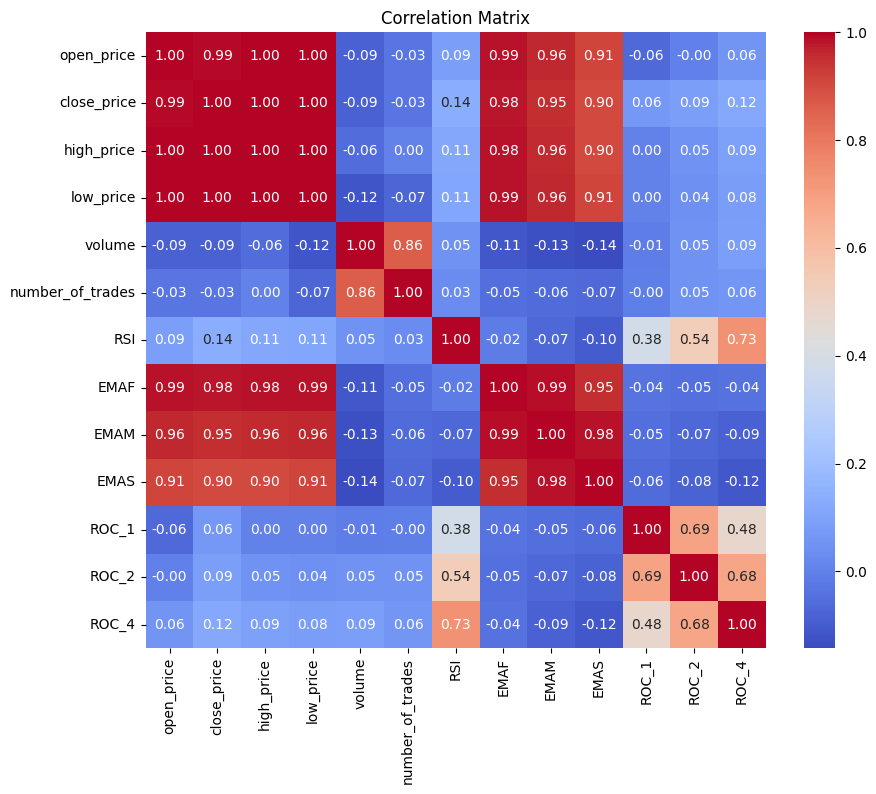

909


,open_price,close_price,high_price,low_price,volume,number_of_trades,RSI,EMAF,EMAM,EMAS,ROC_1,ROC_2,ROC_4
5,0.0000117100,0.0000117000,0.0000117400,0.0000117000,21644986269.0000000000,687,27.2727272727,0.0000117256,0.0000117367,0.0000117426,0.0000000000,0.1712328767,-0.2557544757
6,0.0000117000,0.0000116600,0.0000117100,0.0000116200,73087572615.0000000000,2643,20.0000000000,0.0000117155,0.0000117311,0.0000117394,-0.3418803419,-0.3418803419,-0.6814310051
7,0.0000116500,0.0000116600,0.0000116700,0.0000116400,12951771006.0000000000,405,23.0769230769,0.0000117070,0.0000117258,0.0000117363,0.0000000000,-0.3418803419,-0.1712328767
8,0.0000116600,0.0000115600,0.0000116600,0.0000115500,145331885196.0000000000,6392,9.0909090909,0.0000116843,0.0000117135,0.0000117293,-0.8576329331,-0.8576329331,-1.1965811966
9,0.0000115600,0.0000113900,0.0000115900,0.0000113800,254203752869.0000000000,10151,6.0606060606,0.0000116391,0.0000116896,0.0000117160,-1.4705882353,-2.3156089194,-2.6495726496


In [24]:
columns_to_drop = [
    'ignore', 'is_kline_closed', 'event_time', 'symbol',
    'kline_start_time', 'kline_close_time', 'interval', 'event_type',
    'quote_assest_volume', 'take_buy_base_asset_volume', 'taker_buy_quote_asset_volume',
    'first_trade_id', 'last_trade_id'
]

combined_df = combined_df.drop(columns=columns_to_drop)

#RSI CALCULATION
def calculate_rsi(data, window=6):
    
    delta = data['close_price'].diff()

    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss

    rsi = 100 - (100 / (1 + rs))

    return rsi

combined_df['RSI'] = calculate_rsi(combined_df)


#EMAs CALCULATION
def calculate_ema(combined_df, span):
    return combined_df['close_price'].ewm(span=span, adjust=False).mean()

combined_df['EMAF'] = calculate_ema(combined_df, span=12)
combined_df['EMAM'] = calculate_ema(combined_df, span=26)
combined_df['EMAS'] = calculate_ema(combined_df, span=50)

#ROC CALCULATION
def calculate_roc(combined_df, n):
    return ((combined_df['close_price'] - combined_df['close_price'].shift(n)) / combined_df['close_price'].shift(n)) * 100


combined_df['ROC_1'] = calculate_roc(combined_df, 1)
combined_df['ROC_2'] = calculate_roc(combined_df, 2)
combined_df['ROC_4'] = calculate_roc(combined_df, 4)


combined_df = combined_df.dropna(subset=['close_price', 'RSI', 'ROC_1', 'ROC_2','ROC_4'])

correlation_matrix = combined_df.corr()

print("Correlation Matrix:")

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
print(len(combined_df))
combined_df.head()

In [25]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(combined_df)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, :-1])  
        y.append(data[i + seq_length, -1])     # ROC_1 as target
    return np.array(X), np.array(y)


sequence_length = 10  
n_features = scaled_data.shape[1] - 1  
n_units = 50  


X, y = create_sequences(scaled_data, sequence_length)

X = X.reshape((X.shape[0], X.shape[1], n_features))


split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# Build LSTM model
model = Sequential()
model.add(LSTM(n_units, input_shape=(sequence_length, n_features)))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on test set: {mse}')

# Predictions
predictions = model.predict(X_test)

Epoch 1/50


c:\Users\HP\Desktop\Projects\tradingbot\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0793 - val_loss: 0.0103
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0110 - val_loss: 0.0073
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068 - val_loss: 0.0070
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - val_loss: 0.0069
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0064 - val_loss: 0.0063
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - val_loss: 0.0066
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068 - val_loss: 0.0061
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - val_loss: 0.0056
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - val_loss: 0.0058
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0055 - val_loss: 0.0052
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0048 - val_loss: 0.0050
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - val_loss: 0.0050

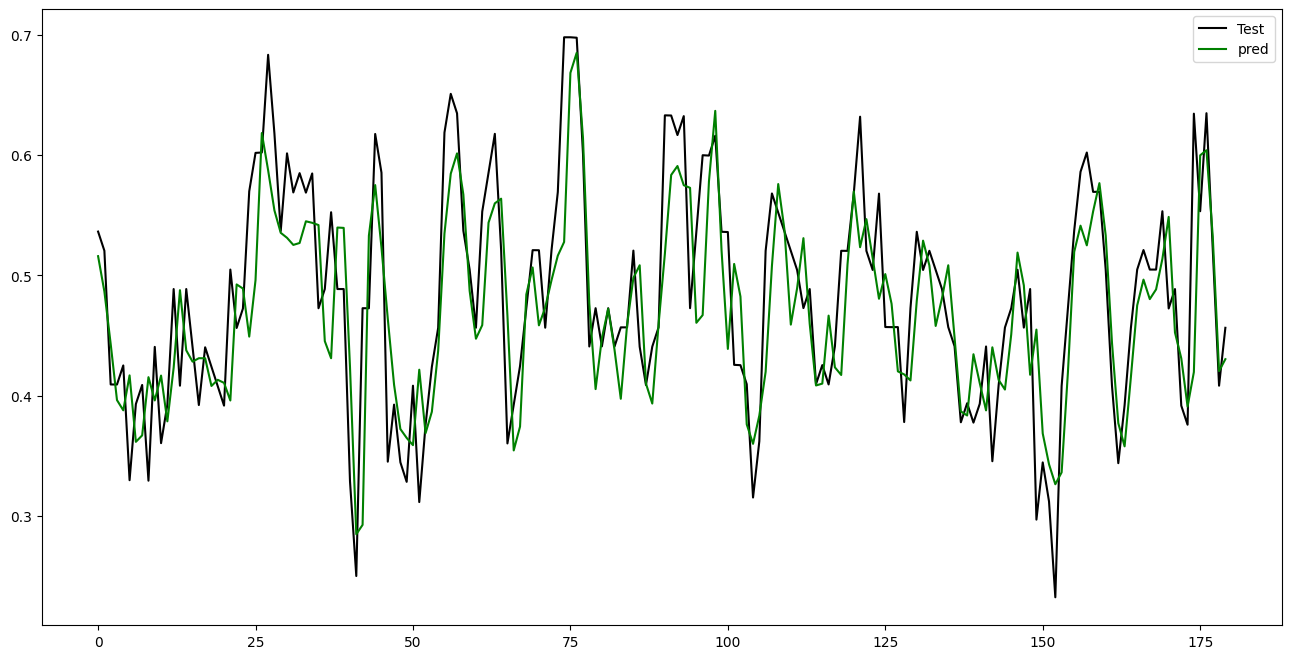

In [26]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(predictions, color = 'green', label = 'pred')
plt.legend()
plt.show()